In [32]:
import random

In [34]:
class SlotMachine:
    def __init__(self, p):
        self.p = p
        self.reward = 0.0
        self.draws = 0
    
    def draw(self):
        self.draws += 1
        if random.uniform(0.0, 1.0) <= self.p:
            self.reward += 1.0
            return 1.0
        return 0.0
    # 현재까지의 평균 기대치
    def getStat(self):
        if self.draws == 0: return 0.0
        return self.reward/self.draws

In [37]:
n = int(input("How many slot machines : "))
machines = []
for i in range(n):
    p = float(input(f"Slot machine {i+1} probability : "))
    machines.append(SlotMachine(p))

e = float(input("Enter epsilon value : "))
k = int(input("How many times do you draw : "))

In [78]:
statics = []
ecs = [e]
ec = e
# k번 레버를 당기는 동안
for i in range(k):
    if random.uniform(0.0, 1.0) <= ec:
        choice = random.randrange(0, n)
    else:
        choice = 0
        maxv = machines[0].getStat()
        for m in range(1, n):
            v = machines[m].getStat()
            if v > maxv:
                choice = m
                maxv = v
    reward = machines[choice].draw()
    statics.append(reward)
    ec *= e
    ecs.append(ec)

print(f"{k}번 시행후 총 보상값 : {sum(statics)}")

10번 시행후 총 보상값 : 4.0


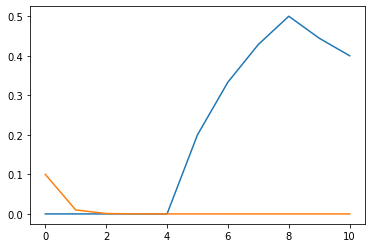

In [79]:
import matplotlib.pyplot as plt

s = [0]
for i in range(k):
    s.append((s[-1]*i+statics[i])/(i+1))
_, ax = plt.subplots()
ax.plot(list(range(k+1)), s, list(range(k+1)), ecs)